Overview 

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

> **Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.**

> **The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.**


# 1.0 Exploratory Data Analysis and Documentation


A. QUESTIONS:
> **The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.**

B. SUCCESS METRIC:

* Banking among men,women and youth (< 30yrs old)
* Insurance
* Informal financial inclusion
* Financial inclusion among women and youth

C. Data Appropriatness:
  * we only have two datasets total financial dataset and a finscope data of Tanzania in the year 2017

D. Analysis methodologies used:

  * Univariate analysis

## 1.0.1 READING THE DATA

In [1]:
# importing libraries and dependancies:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()

In [2]:
# importing data:
tot_financial_df = pd.read_csv("Financial Dataset.csv")

## 1.0.2 CHECKING THE DATA

> Includes:


In [3]:
# total financial df
tot_financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
# check info
tot_financial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [5]:
# describe
tot_financial_df.describe(include='all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_1913,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [6]:
# shape
tot_financial_df.shape

(23524, 13)

In [7]:
# check sum of null values
tot_financial_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [8]:
# check columns
tot_financial_df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

## 1.0.3 DATA CLEANING.

### >> cleaning total financial dataset

In [9]:
# drop unneccessary columns
tot_df = tot_financial_df.drop(['uniqueid', 'The relathip with head', 'marital_status'], axis = 1)

In [10]:
# check columns
tot_df.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'Level of Educuation', 'Type of Job'],
      dtype='object')

In [11]:
# drop null values
tot_df.dropna(inplace=True)

In [12]:
# check missing values.
tot_df.isnull().sum()

country                 0
year                    0
Has a Bank account      0
Type of Location        0
Cell Phone Access       0
household_size          0
Respondent Age          0
gender_of_respondent    0
Level of Educuation     0
Type of Job             0
dtype: int64

In [13]:
# head
tot_df.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Primary education,Informally employed


In [14]:
#tail
tot_df.tail()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
23519,Uganda,2018,No,Rural,Yes,4.0,48.0,Female,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5.0,27.0,Female,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7.0,30.0,Female,Secondary education,Self employed
23523,Uganda,2018,No,Rural,Yes,10.0,20.0,Male,Secondary education,No Income


In [15]:
tot_df.dtypes

country                  object
year                      int64
Has a Bank account       object
Type of Location         object
Cell Phone Access        object
household_size          float64
Respondent Age          float64
gender_of_respondent     object
Level of Educuation      object
Type of Job              object
dtype: object

In [16]:
tot_df.describe()

,year,household_size,Respondent Age
count,23362.000000,23362.000000,23362.000000
mean,2016.980053,3.688511,38.806909
std,0.901670,2.280924,16.522700
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


# 2.0 UNIVARIATE ANALYSIS

### >>> Total financial data

In [17]:
# check shape
tot_df.shape

(23362, 10)

In [18]:
# check unique values
tot_df.nunique()

country                  4
year                     6
Has a Bank account       2
Type of Location         2
Cell Phone Access        2
household_size          21
Respondent Age          85
gender_of_respondent     2
Level of Educuation      7
Type of Job             10
dtype: int64

In [19]:
# print uniques
print("Countries >>>>> ",tot_df.country.unique(), "\n")
print("Year >>>>>> ", tot_df.year.unique(),"\n")
print("Bank acc >>>> ",tot_df['Has a Bank account'].unique(), "\n")
print("Gender >>>>>>> ",tot_df['gender_of_respondent'].unique(),"\n")
print("Job type >>>>>>> ",tot_df['Type of Job'].unique(),"\n")
print("Edu lvl >>>>>>> ",tot_df['Level of Educuation'].unique(),"\n")
print("mbl accs >>>>>>> ",tot_df['Cell Phone Access'].unique(),"\n")


Countries >>>>>  ['Kenya' 'Rwanda' 'Tanzania' 'Uganda'] 

Year >>>>>>  [2018 2029 2056 2016 2039 2017] 

Bank acc >>>>  ['Yes' 'No'] 

Gender >>>>>>>  ['Female' 'Male'] 

Job type >>>>>>>  ['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' 'No Income'] 

Edu lvl >>>>>>>  ['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA' '6'] 

mbl accs >>>>>>>  ['Yes' 'No'] 



#### RESEARCH Q:
> **The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.**

In [20]:
# yes = with bank acount,no = without bank acount
y_bank_acc = tot_df[tot_df['Has a Bank account'] == 'Yes']
n_bank_acc =  tot_df[tot_df['Has a Bank account'] == 'No']

In [21]:
# yes/no with mobile phone access
y_mbl_accs = tot_df[tot_df['Cell Phone Access'] == 'Yes']
n_mbl_accs = tot_df[tot_df['Cell Phone Access'] == 'No']

In [22]:
# rural urban
rural = tot_df[tot_df['Type of Location'] == 'Rural']
urban = tot_df[tot_df['Type of Location'] == 'Urban']

#### Analaysis 1

In [23]:
# =========================== analysis ===================================


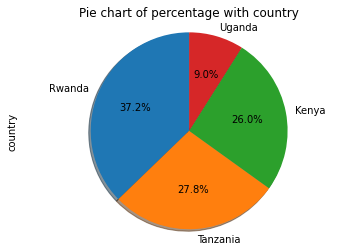

'\n> From this we can conclude that Rwanda had the highest number \nof people who were questioned for this survey\n> This was followed by Tanzania and Kenya.\n'

In [24]:
# pie chart of countries
tot_df.country.value_counts().plot(kind='pie',autopct='%1.1f%%', shadow = True, startangle = 90 )
plt.axis('equal')
plt.title('Pie chart of percentage with country')
plt.show()


# ==================================== OBSERVATION =================================
"""
> From this we can conclude that Rwanda had the highest number 
of people who were questioned for this survey
> This was followed by Tanzania and Kenya.
"""

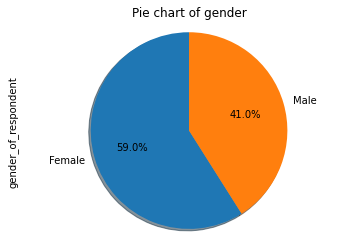

'\n> From this we can see from the analysis\nmore Females were surveyed than males.\n'

In [25]:
# pie chart of gender
tot_df['gender_of_respondent'].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow = True, startangle = 90 )
plt.axis('equal')
plt.title('Pie chart of gender')
plt.show()


# ==================================== OBSERVATION =================================
"""
> From this we can see from the analysis
more Females were surveyed than males.
"""

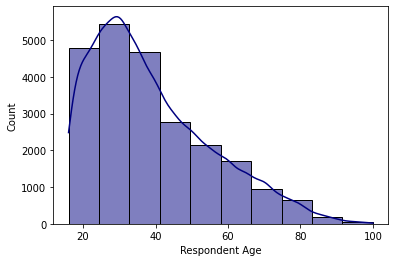

In [26]:
#histogram showing age 
sns.histplot(data=tot_df, x='Respondent Age', kde=True, color = 'navy', bins=10)

#We can conclude that the greater population in the dataset is between the ages of 25 and 40

In [27]:
tot_df.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'Level of Educuation', 'Type of Job'],
      dtype='object')

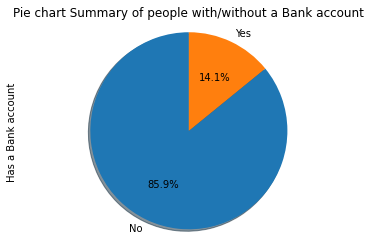

'\nFrom this we can see from the analysis\nmost people dont have  bank accounts in East Africa.\n'

In [28]:
# pie chart of bank acount owners
tot_df['Has a Bank account'].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow = True, startangle = 90 )
plt.axis('equal')
plt.title('Pie chart Summary of people with/without a Bank account')
plt.show()

# ==================================== OBSERVATION =================================
"""
From this we can see from the analysis
most people dont have  bank accounts in East Africa.
"""

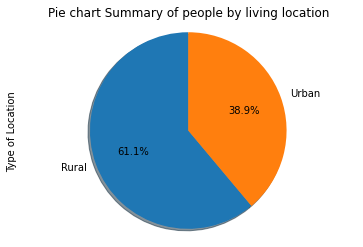

'\nFrom this we can see from the analysis\nmost people live in Rural areas thus explaining why theres less people \nhaving bank accounts.\n'

In [29]:
# pie chart of bank acount owners
tot_df['Type of Location'].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow = True, startangle = 90 )
plt.axis('equal')
plt.title('Pie chart Summary of people by living location')
plt.show()

# ==================================== OBSERVATION =================================
"""
From this we can see from the analysis
most people live in Rural areas thus explaining why theres less people 
having bank accounts.
"""

#### Analysis 2

In [30]:
tot_df.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'Level of Educuation', 'Type of Job'],
      dtype='object')

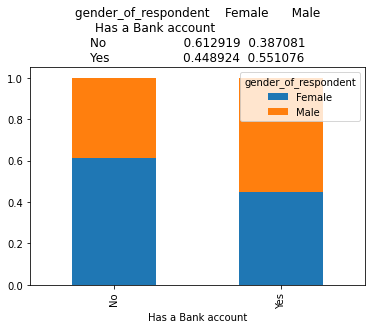

In [31]:

# Which of the gende is more likely to have a bank acc
g_b_acc = tot_df.groupby('Has a Bank account')['gender_of_respondent'].value_counts(normalize=True).unstack()

g_b_acc.plot(kind='bar', stacked='True',title=str(g_b_acc))

# more men than women are more likely to own a bank account

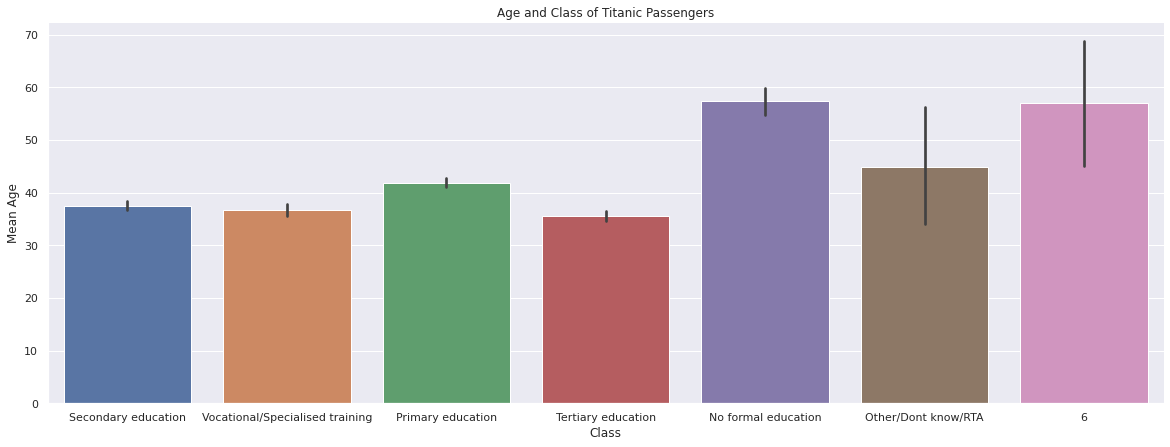

In [56]:
# people with bank accounts educational level
sns.set(rc={"figure.figsize":(20, 7)}) #width=6, height=5

sns.barplot(data=y_bank_acc, x='Level of Educuation', y='Respondent Age')

plt.title('age of people with bank accounts educational level')
plt.xlabel('education type')
plt.ylabel('Ages')
sns.despine()
plt.show()

# observation:
# most people with bank accounts are fairly educated

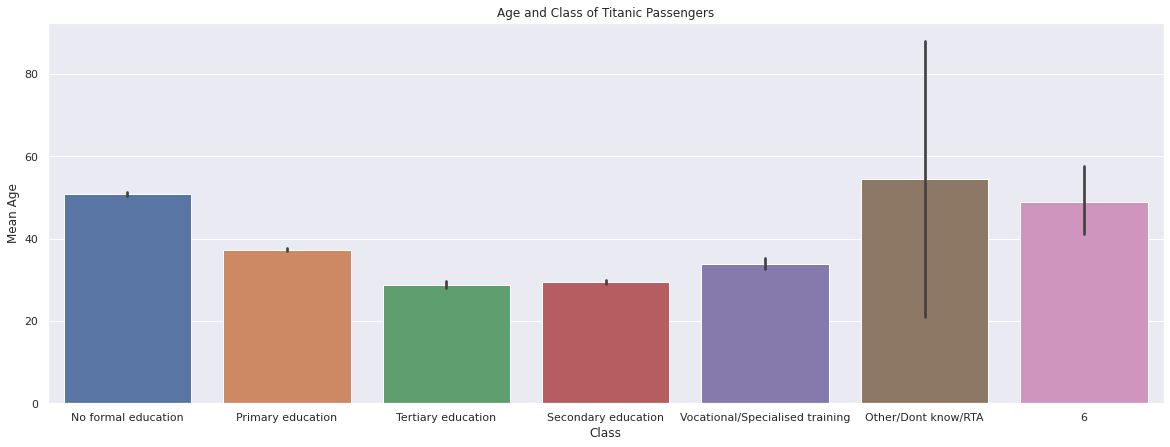

In [58]:
# people without bank accounts educational level
sns.set(rc={"figure.figsize":(20, 7)}) #width=6, height=5

sns.barplot(data=n_bank_acc, x='Level of Educuation', y='Respondent Age')

plt.title('Age and Class of Titanic Passengers')
plt.xlabel('Class')
plt.ylabel('Mean Age')
#sns.despine()
plt.show()

# observation:
# most people without bank accounts have no formaal or just little education

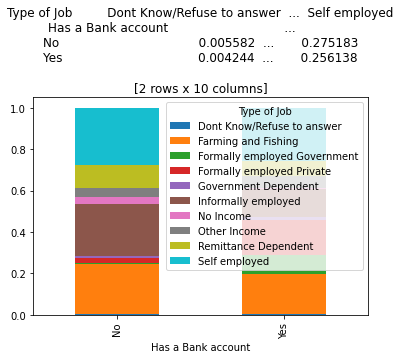

In [32]:

#People from which kind of jobs are most likely to own a bank account
j_bnk_acc = tot_df.groupby('Has a Bank account')['Type of Job'].value_counts(normalize=True).unstack()


j_bnk_acc.plot(kind='bar', stacked='True',title=str(j_bnk_acc))

# observation:
# those who are self employed seem to be ones with most bank accounts, followed by remittance dependent

## **SUMMARY UNIVARIETE ANALYSIS**
> ANALYSIS 1

* Rwanda had the highest number 
of people who were questioned for this survey
This was followed by Tanzania and Kenya. 
* From this we can see from the analysis
more Females were surveyed than males.
* We can conclude that the greater population in the dataset is between the ages of 25 and 40

* From this we can see from the analysis
most people dont have  bank accounts in East Africa.

* From this we can see from the analysis
most people live in Rural areas thus explaining why theres less people 
having bank accounts.





> ANALYSIS 2

*  more men than women are more likely to own a bank account
* most people with bank accounts are fairly educated

* most people without bank accounts have no formaal or just little education

* those who are self employed seem to be ones with most bank accounts, followed by remittance dependent



# 3.0 Bivariate Analysis


### Q: relationship between Age and Bank account.


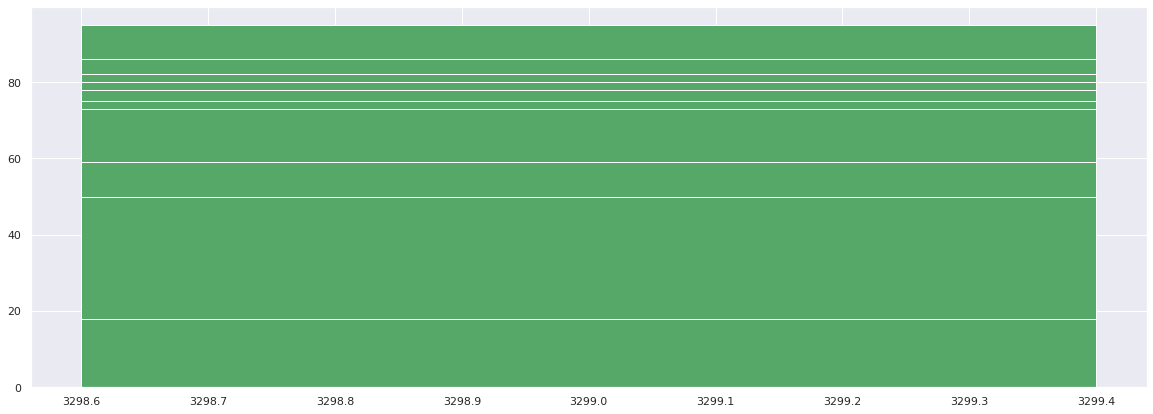

In [69]:
sns.set(rc={"figure.figsize":(20, 7)}) 
x = y_bank_acc['Has a Bank account'].value_counts().tolist()
y =  y_bank_acc['Respondent Age']

plt.bar(x,y, color='g')


# Displaying our chart
plt.show()

# 4.0 Multivariate Analysis


## 4.0.1 PCA ANALYSIS

##### Does age and house size affect having a bank account??

In [80]:
# 1. view columns
tot_df.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'Level of Educuation', 'Type of Job'],
      dtype='object')

In [81]:
#2. Drop unneccesary columns if any
new_df = tot_df.drop(['country', 'year','Type of Location',
       'Cell Phone Access','gender_of_respondent', 'Level of Educuation', 'Type of Job'], axis = 1)

In [ ]:
#3. Drop null values
#df.dropna(inplace=True)

In [82]:
#4. Checking the datatypes
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23362 entries, 0 to 23523
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Has a Bank account  23362 non-null  object 
 1   household_size      23362 non-null  float64
 2   Respondent Age      23362 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.3+ MB


In [83]:
#5. Previewing our dataset
new_df.head()

,Has a Bank account,household_size,Respondent Age
0,Yes,3.0,24.0
1,No,5.0,70.0
2,Yes,5.0,26.0
3,No,5.0,34.0
4,No,8.0,26.0


In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [94]:
# features
f = [
  'household_size', 'Respondent Age'
]

# Separating out the features
X = new_df.loc[:, f].values

# Separating out the target
y = new_df.loc[:,['Has a Bank account']].values
               
# Standardizing the features
x = StandardScaler().fit_transform(X)


In [95]:
print(x)

[[-0.30186272 -0.89617469]
 [ 0.57499359  1.88793351]
 [ 0.57499359 -0.77512651]
 ...
 [ 0.57499359 -0.71460242]
 [ 1.4518499  -0.53303015]
 [ 2.76713437 -1.13827106]]


In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [98]:
pca = PCA(n_components=1)

p_c = pca.fit_transform(x)

pc_Df = pd.DataFrame(data = p_c,columns = ['principle comp'])

In [100]:
pc_Df

,principle comp
0,0.420242
1,-0.928389
2,0.954679
3,0.612303
4,1.884726
...,...
23357,-0.296870
23358,-0.018164
23359,0.911882
23360,1.403522


In [101]:
# join with the other section
final_df = pd.concat([pc_Df, new_df[['Has a Bank account']]], axis = 1)

In [102]:
final_df

,principle comp,Has a Bank account
0,0.420242,Yes
1,-0.928389,No
2,0.954679,Yes
3,0.612303,No
4,1.884726,No
...,...,...
23519,NaN,No
23520,NaN,No
23521,NaN,No
23522,NaN,No


In [107]:
pca = PCA()

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [108]:
explained_variance = pca.explained_variance_ratio_

In [109]:
print(explained_variance)

[0.98163349 0.01836651]


In [111]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [115]:
print([i for i in y_pred.tolist()]) # inconclusive.

['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No